# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если набран как минимум 1 балл.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект:
- заполняете данный ноутбук
- создаете приватный репозиторий в GitHub
- добавляете в него проверяющего
- загружаете заполненный ноутбук в отдельную ветку
- создаете MR с указанием проверяющего

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [1]:
%%bash
gdown 1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM

Downloading...
From: https://drive.google.com/uc?id=1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM
To: /content/coins.csv
100%|██████████| 3.98M/3.98M [00:00<00:00, 67.3MB/s]


Начнем с необходимых приготовлений.

In [103]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла `coins.csv`. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [4]:
data = pd.read_csv('coins.csv', index_col=['date'])
coins = pd.DataFrame(data=data)

Посмотрим что получилось

In [5]:
coins.head(4)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [75]:
print(coins['name'].value_counts().size)

70


### 2. За какой период данные мы имеем? (0.4 балла)

In [72]:
period_start = coins.index.min()
period_end = coins.index.max()
print("Период данных с", period_start, "по", period_end)

Период данных с 2013-04-28 00:00:00 по 2018-06-06 00:00:00


### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [76]:
missing_values = coins.isnull().sum()
missing_values



price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64

### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [18]:
highest_price = coins.loc[coins['high'] == coins['high'].max(), ['symbol', 'high']]
print(highest_price.symbol[0], highest_price.index[0], sep=' ')

BTC 2017-12-17


### 5. У какой монеты самая высокая и самая низкая средняя капитализация (среднее арифметическое капитализаций за все доступные дни)? Постройте круговую диаграмму с долями. (0.5 балла)

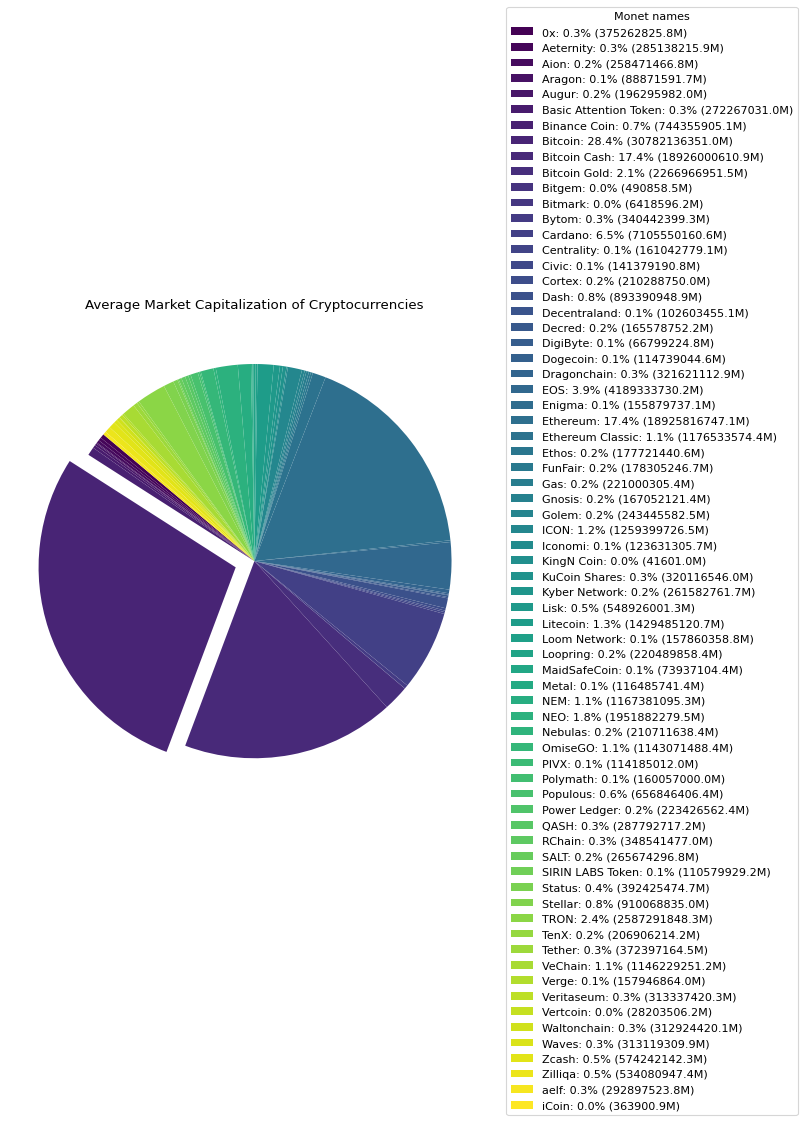

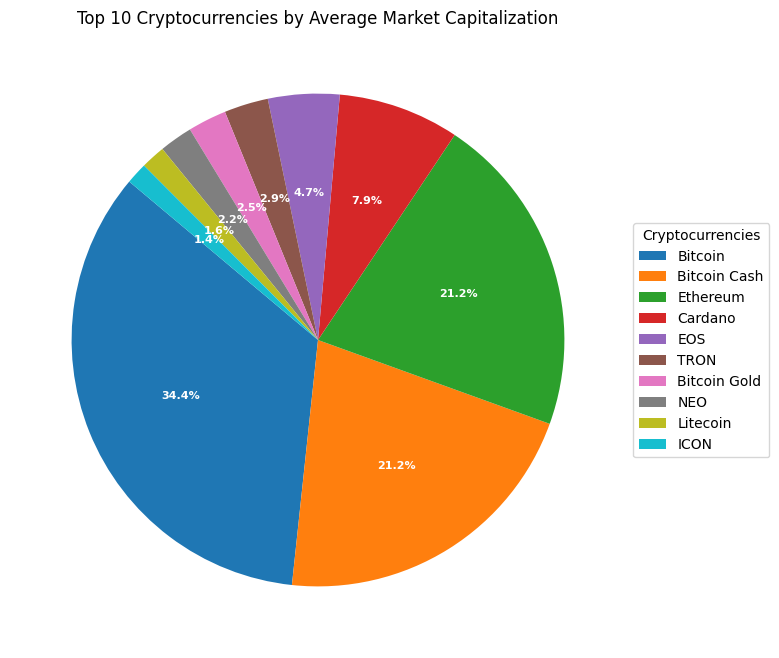

In [130]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_raw = pd.read_csv('coins.csv')
market_coins = df_raw.groupby('name')['market'].mean()

data = market_coins.values
categories = market_coins.index
total_market = sum(data)
explode = [0.1 if i == market_coins.idxmax() or i == market_coins.idxmin() else 0 for i in categories]

fig, ax = plt.subplots(figsize=(10, 8), dpi=80)
wedges, texts = ax.pie(data,
                       colors=plt.cm.viridis(np.linspace(0, 1, len(categories))),
                       startangle=140,
                       explode=explode)

legend_labels = [f'{name}: {value/total_market*100:.1f}% ({value:.1f}M)' for name, value in zip(categories, data)]
ax.legend(wedges, legend_labels, title="Monet names", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("Average Market Capitalization of Cryptocurrencies")
plt.show()


average_market_cap = coins.groupby('name')['market'].mean()

top_coins = average_market_cap.nlargest(10)

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

wedges, texts, autotexts = ax.pie(top_coins, autopct=lambda pct: func(pct, top_coins),
                                  textprops=dict(color="w"),
                                  startangle=140)

ax.legend(wedges, top_coins.index, title="Cryptocurrencies", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Top 10 Cryptocurrencies by Average Market Capitalization")

plt.show()


## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `candlestick_ohlc` (`from mplfinance.original_flavor import candlestick_ohlc`), но можно и без него.

In [109]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    data = coins[(coins['symbol'] == symbol) & (coins.index >= start_date) & (coins.index <= end_date)]

    fig, ax = plt.subplots(figsize=(16, 9))

    ax.plot(data.index, data['open'], color='red', label='Цена открытия')
    ax.plot(data.index, data['close'], color='green', label='Цена закрытия')

    ax.fill_between(data.index, data['low'], data['high'], color='gray', alpha=0.3, label='Диапазон цен за день')

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
    plt.xticks(rotation=45)

    ax.set_title(f'Ценовое действие {symbol} с {start_date} по {end_date}', fontsize=20)
    ax.set_xlabel('Дата', fontsize=15)
    ax.set_ylabel('Цена (USD)', fontsize=15)
    ax.legend()

    plt.grid(True)
    plt.show()

Посмотрим, что получилось:

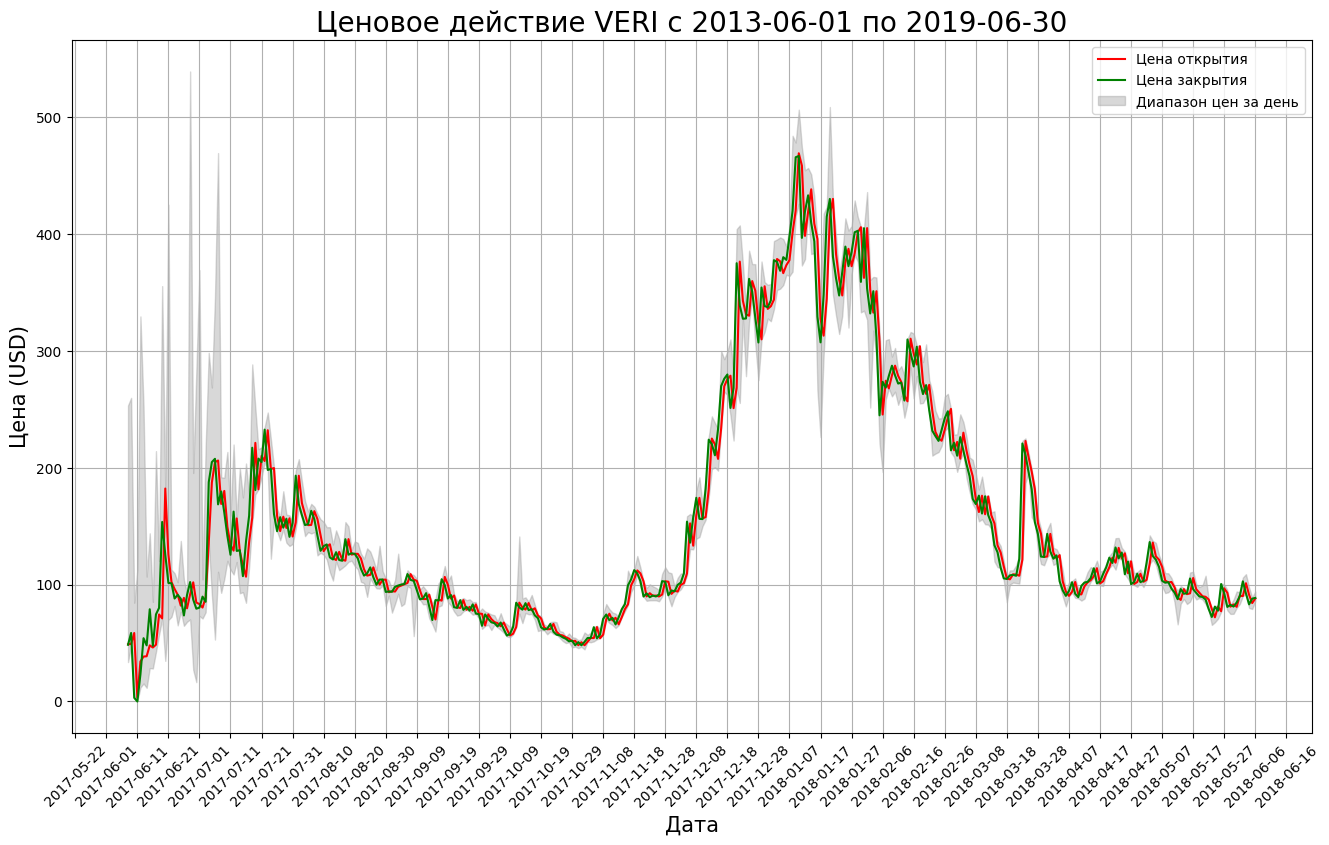

In [110]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30')

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс).

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [94]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    table = coins[coins['symbol'] == symbol][start_date:end_date]
    table = table.loc[start_date:end_date]
    max_oc_price = table[['open', 'close']].max(axis=1)
    pnd = table.high / max_oc_price
    return pnd.idxmax(), pnd.max()

In [95]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

(Timestamp('2017-11-29 00:00:00'), 1.1428940004366206)

Сравните эти значения для разных монет:

In [96]:
for coin_name in set(coins.symbol):
    result = find_most_severe_pump_and_dump(coins, symbol=coin_name, start_date='2017-06-01', end_date='2018-06-01')
    if result[1] < 2:
        print(result, f'pnd в пределах нормы, скорее всего {coin_name} не накачивали')
    else:
        print(result, f'pnd выше нормы, скорее всего {coin_name} накачивали')

(Timestamp('2017-06-11 00:00:00'), 33.549253731343285) pnd выше нормы, скорее всего VERI накачивали
(Timestamp('2017-10-13 00:00:00'), 1.7336683417085428) pnd в пределах нормы, скорее всего ANT не накачивали
(Timestamp('2017-11-02 00:00:00'), 1.3641688298886077) pnd в пределах нормы, скорее всего POWR не накачивали
(Timestamp('2018-02-21 00:00:00'), 5.777033492822967) pnd выше нормы, скорее всего BTG накачивали
(Timestamp('2017-11-24 00:00:00'), 1.3624161073825503) pnd в пределах нормы, скорее всего AION не накачивали
(Timestamp('2017-12-25 00:00:00'), 1.3618677042801557) pnd в пределах нормы, скорее всего ENG не накачивали
(Timestamp('2017-09-28 00:00:00'), 1.3298776561493881) pnd в пределах нормы, скорее всего ZEC не накачивали
(Timestamp('2017-10-22 00:00:00'), 1.3952095808383234) pnd в пределах нормы, скорее всего VTC не накачивали
(Timestamp('2017-10-16 00:00:00'), 1.332510511325105) pnd в пределах нормы, скорее всего XLM не накачивали
(Timestamp('2017-07-14 00:00:00'), 1.33121480

## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени.

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [68]:
def compute_roi(coins, investments, start_date, end_date):
    start_prices = coins[coins.index == start_date][['symbol', 'price']].set_index('symbol')['price']
    end_prices = coins[coins.index == end_date][['symbol', 'price']].set_index('symbol')['price']

    initial_value = 0
    final_value = 0

    for symbol, invested_amount in investments.items():
        initial_quantity = invested_amount / start_prices[symbol]
        final_value += initial_quantity * end_prices[symbol]
        initial_value += invested_amount
    roi = (final_value - initial_value) / initial_value
    return roi

In [69]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

-0.035569133065275614

In [70]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

51.28330296529592

## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто:

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [63]:
def plot_bollinger_bands(coins, symbol, window, width):

    data = coins[coins['symbol'] == symbol]

    ma = data['price'].rolling(window=window).mean()
    std = data['price'].rolling(window=window).std()
    upper_band = ma + (width * std)
    lower_band = ma - (width * std)

    plt.figure(figsize=(15, 7))
    plt.plot(data['price'], label='Price', color='blue')
    plt.plot(ma, label='Moving Average', color='red')
    plt.fill_between(data.index, lower_band, upper_band, color='gray', alpha=0.3, label='Bollinger Bands')

    plt.title(f'Bollinger Bands for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()


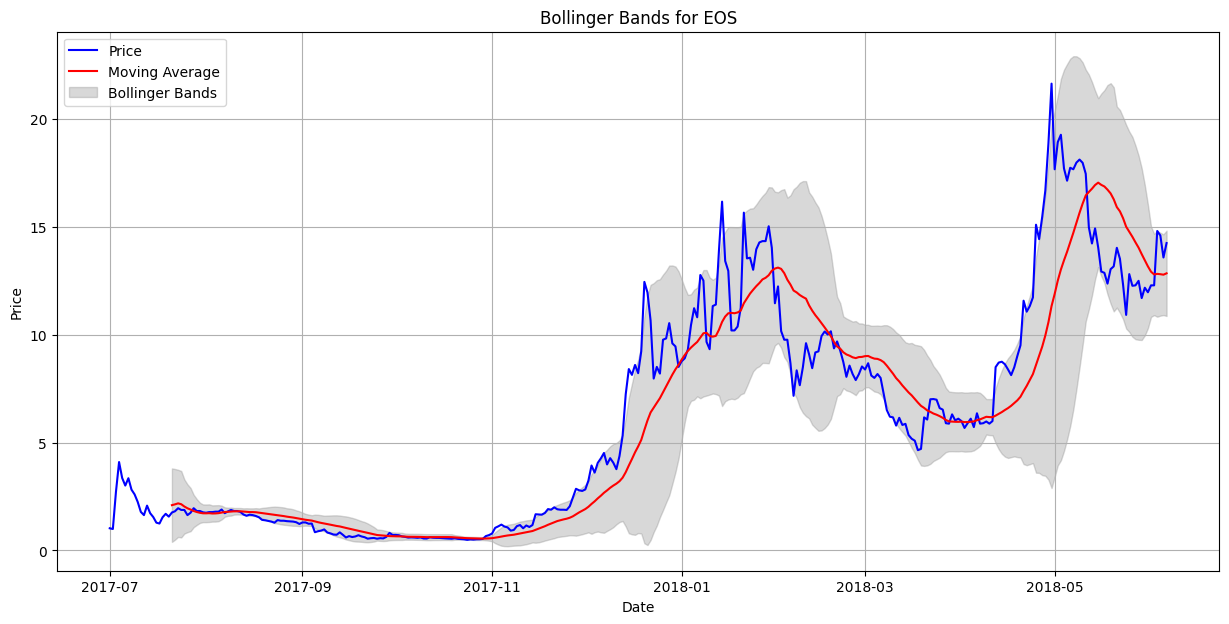

In [64]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

После визуализации границ Боллинджера можно анализировать, насколько часто цена отскакивает от этих границ. В теории, когда цена касается нижней границы, это может считаться сигналом к покупке, а касание верхней границы - сигналом к продаже. Однако важно помнить, что технический анализ не гарантирует точных результатов и должен использоваться в сочетании с другими инструментами и анализом рынка.

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка.

При этом используйте данные начиная с 2017-07-01.

In [53]:
def plot_coins_capitalizations(coins, symbols, start_date):
    filtered_coins = coins[(coins['symbol'].isin(symbols)) & (coins.index >= start_date)]

    coin_caps = filtered_coins.pivot_table(index=filtered_coins.index, columns='symbol', values='market', aggfunc='sum')

    total_market_cap = coin_caps.sum(axis=1)

    market_share = coin_caps.divide(total_market_cap, axis=0)

    fig, ax = plt.subplots(2, 1, figsize=(14, 12))

    coin_caps.plot(ax=ax[0])
    ax[0].set_title('Общая Капитализация Монет')
    ax[0].set_ylabel('Капитализация (USD)')
    ax[0].grid(True)

    market_share.plot(ax=ax[1])
    ax[1].set_title('Доли Капитализаций Монет от Общей Капитализации Рынка')
    ax[1].set_ylabel('Доля')
    ax[1].grid(True)

    plt.show()



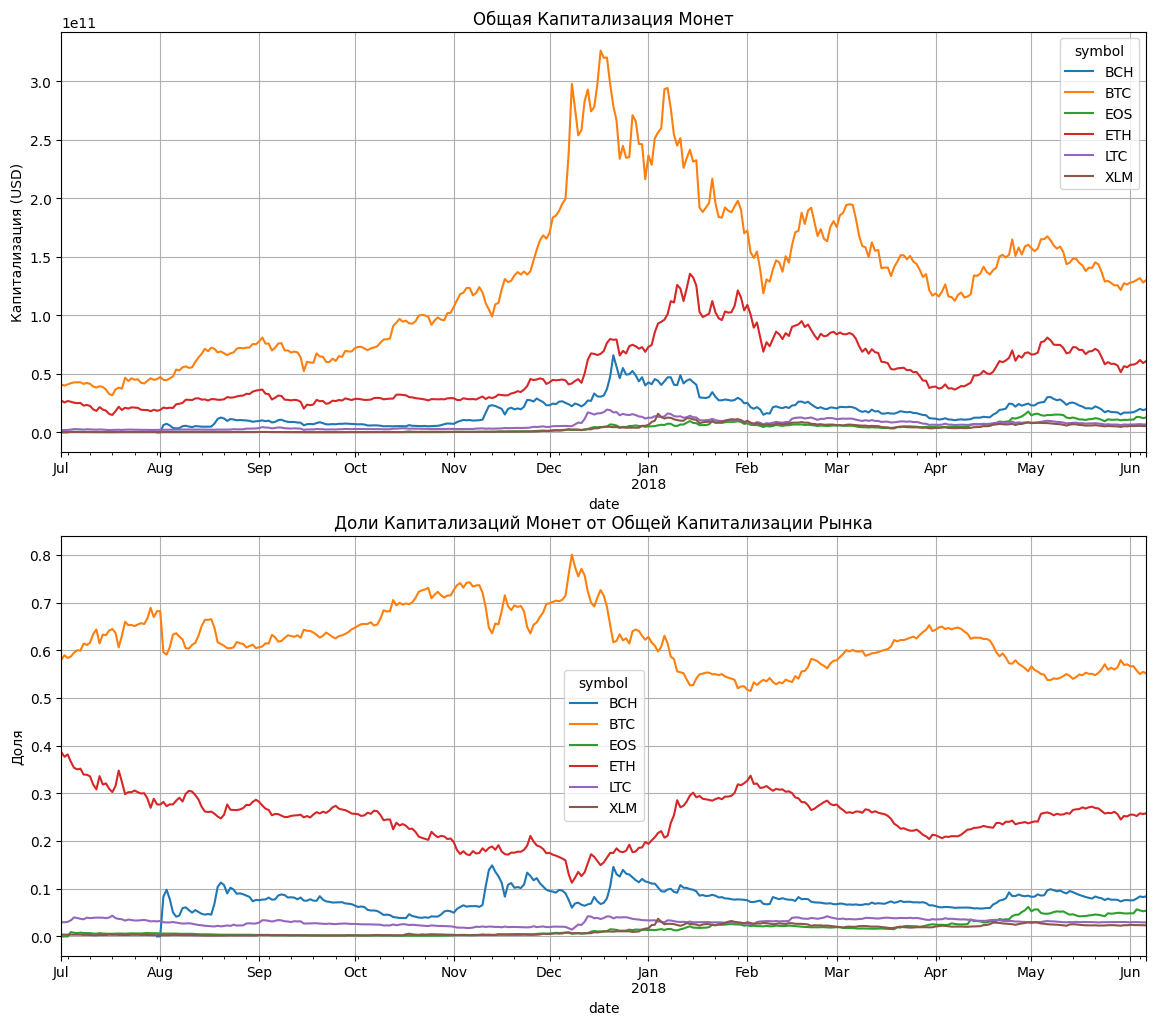

In [54]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

Важно отметить, что рынок криптовалют отличается высокой волатильностью и неопределенностью, и множество факторов могут влиять на долю капитализации различных монет. Также стоит учитывать, что корреляция между долями капитализации не обязательно указывает на прямую причинно-следственную связь.

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [34]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    filtered_data = coins.loc[:date]

    coins_interest = filtered_data[filtered_data['symbol'].isin(symbols)]

    smoothed_markets = {}
    for symbol in symbols:
        market_data = coins_interest[coins_interest['symbol'] == symbol]['market']
        smoothed_markets[symbol] = market_data.ewm(alpha=alpha, adjust=False).mean()

    smoothed_df = pd.DataFrame(smoothed_markets)

    correlations = smoothed_df.corr()

    return correlations



In [38]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
correlations.style.background_gradient(cmap='coolwarm').format(precision=2)

,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,0.94,0.56,0.95,0.86,0.98,0.75
ETH,0.94,1.00,0.74,0.81,0.94,0.96,0.94
EOS,0.56,0.74,1.00,0.55,0.84,0.67,0.55
BCH,0.95,0.81,0.55,1.00,0.74,0.90,0.83
XLM,0.86,0.94,0.84,0.74,1.00,0.92,0.91
LTC,0.98,0.96,0.67,0.90,0.92,1.00,0.85
ADA,0.75,0.94,0.55,0.83,0.91,0.85,1.00


Довольно интересно ещё взглянуть на 2017-12-27:

In [37]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
correlations.style.background_gradient(cmap='coolwarm').format(precision=2)

,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,0.92,0.90,0.94,0.92,0.96,0.90
ETH,0.92,1.00,0.93,0.95,0.79,0.91,0.97
EOS,0.90,0.93,1.00,0.90,0.98,0.98,0.98
BCH,0.94,0.95,0.90,1.00,0.91,0.88,0.87
XLM,0.92,0.79,0.98,0.91,1.00,0.95,0.98
LTC,0.96,0.91,0.98,0.88,0.95,1.00,0.98
ADA,0.90,0.97,0.98,0.87,0.98,0.98,1.00


## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

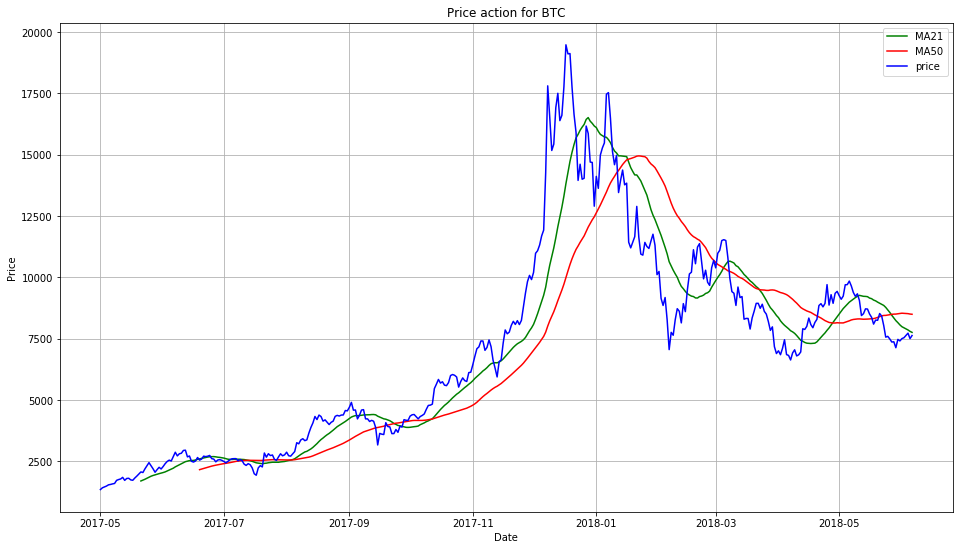

In [ ]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)

    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show()

plot_moving_averages(
    coins=coins,
    symbol='BTC',
    leading_window=21,
    lagging_window=50,
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия/


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

Иными словами сравниваем 2 подхода:
- сразу в начальный момент времени купить крипты на все деньги - обычное инвестирование
- ждать подходящих моментов и покупать только в них равными порциями - стратегия

Считайте, что суммарное количество вложенных денег в обоих подходах одинаковое.

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

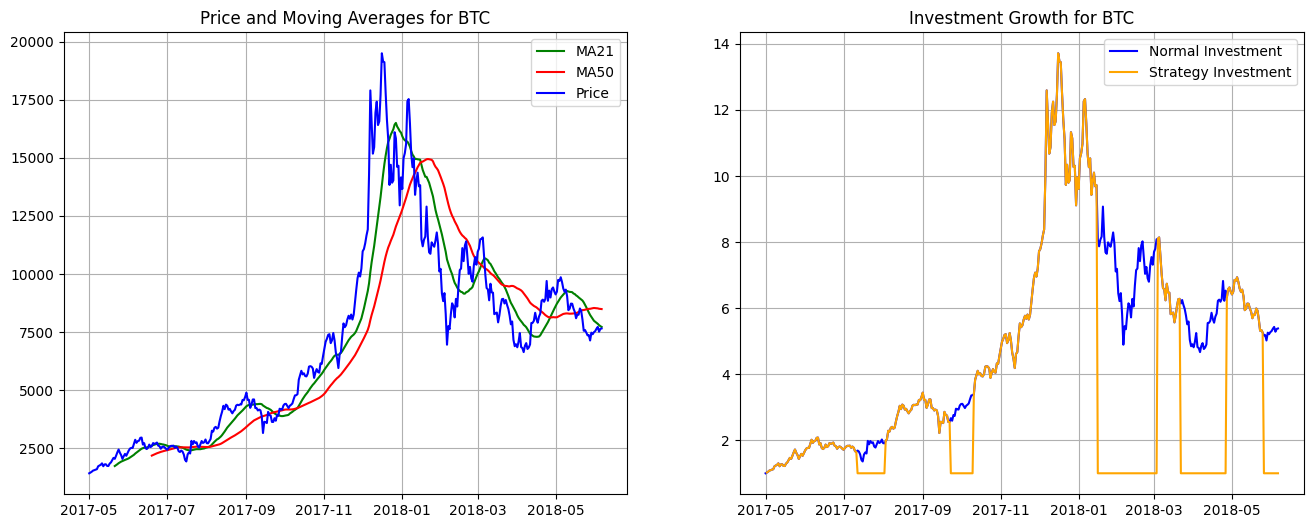

In [51]:
def plot_moving_averages_strategy(coins, symbol, lead_window, lag_window, threshold, start_date, end_date):
    if not isinstance(coins.index, pd.DatetimeIndex):
        coins.index = pd.to_datetime(coins.index)

    data = coins[(coins['symbol'] == symbol) & (coins.index >= start_date) & (coins.index <= end_date)]
    price = data['close']

    leading_mean = price.rolling(window=lead_window).mean()
    lagging_mean = price.rolling(window=lag_window).mean()

    normal_invest = price / price.iloc[0]
    strategy_invest = (price / price.shift(1)).cumprod()
    strategy_invest[leading_mean <= lagging_mean] = 1

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    ax[0].plot(price.index, leading_mean, label='MA{}'.format(lead_window), color='green')
    ax[0].plot(price.index, lagging_mean, label='MA{}'.format(lag_window), color='red')
    ax[0].plot(price.index, price, label='Price', color='blue')
    ax[0].set_title(f'Price and Moving Averages for {symbol}')
    ax[0].legend()
    ax[0].grid(True)

    ax[1].plot(price.index, normal_invest, label='Normal Investment', color='blue')
    ax[1].plot(price.index, strategy_invest, label='Strategy Investment', color='orange')
    ax[1].set_title(f'Investment Growth for {symbol}')
    ax[1].legend()
    ax[1].grid(True)

    plt.show()

plot_moving_averages_strategy(
    coins=coins,
    symbol='BTC',
    lead_window=21,
    lag_window=50,
    threshold=0.025,
    start_date=pd.Timestamp('2017-05-01'),
    end_date=pd.Timestamp('2018-08-01')
)


In [52]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21,
    min=1,
    max=200,
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1,
    max=200,
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0,
    max=0.20,
    step=0.001,
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

interactive(children=(Dropdown(description='symbol', layout=Layout(width='700px'), options=('BTC', 'ETH', 'EOS…

<function __main__.plot_moving_averages_strategy(coins, symbol, lead_window, lag_window, threshold, start_date, end_date)>

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

После проведения анализа с различными параметрами и для разных монет, можно сделать выводы о применимости такой стратегии. Важно помнить, что результаты прошлых периодов не гарантируют аналогичные результаты в будущем. Также следует учитывать риски, связанные с частыми транзакциями, такие как комиссии и налоги.


## 9. Отказ от ответственности

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.